<a href="https://colab.research.google.com/github/BMCC-Muzician/BMCC-DS/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
from sklearn.inspection import permutation_importance
warnings.filterwarnings("ignore")

### Random Forest and Bagging

Recall that one of the big drawbacks of the Decision Tree is that it tends to overfit. Even with pruning, this problem still may be there. So, to fix this problem we can use a very popular model called Random Forest. A random forest is an example of Ensemble. Ensamble in ML means we are using many models at the same time. In this case, we will have many decision trees working together (hence the name: forest). The idea is that even if each individual tree may be overfitting, the a whole ensamble on average doesn't overfit as much. Here how this actually works:

1. We set the amount of trees we want in the forest (usually very large number).
2. For each tree we create, we take at random some amount of data (usually around 80%) and train the tree. And use remaining data to measure accuracy.
3. If we get a new data point and want to predict the value, we plug it into every tree and take mode (majority) as our prediction. (For regression you can take average)

This idea of taking random samples each time is called Bagging and it can be used in other ensamble models as well.

A small nice bonus of the forest is that we also can measure uncertainty of our prediction by noting how many trees were for our prediction and how many were against.

In [ ]:
dataset=datasets.load_iris()
X = dataset.data
y = dataset.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10,                         # number of trees
                                       criterion='gini',
                                       max_samples=int(X_train.shape[0]*0.8),   # amount of samples in each tree
                                       min_impurity_decrease=0.1,
                                       max_depth=3,
                                       max_features=None,                       # we are using all features
                                       oob_score=True,                          # out of bag accuracy score
                                       random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=None, max_samples=96,
                       min_impurity_decrease=0.1, n_estimators=10,
                       oob_score=True, random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
oob_score = rf_classifier.oob_score_
print(f'Out-of-Bag Score: {oob_score:.2f}')

Accuracy: 1.00
Out-of-Bag Score: 0.94


Let's take one sample and see the probabilites assigned to it by our model

In [ ]:
rf_classifier.predict_proba(X_test[1].reshape(1,-1))

array([[0.        , 0.94269948, 0.05730052]])

As you can see, our model thinks this point belongs to class 1 with 94% confidence.

In [ ]:
y_test[1]

1

In [ ]:
rf_classifier.estimators_[0]

DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.1,
                       random_state=1608637542)

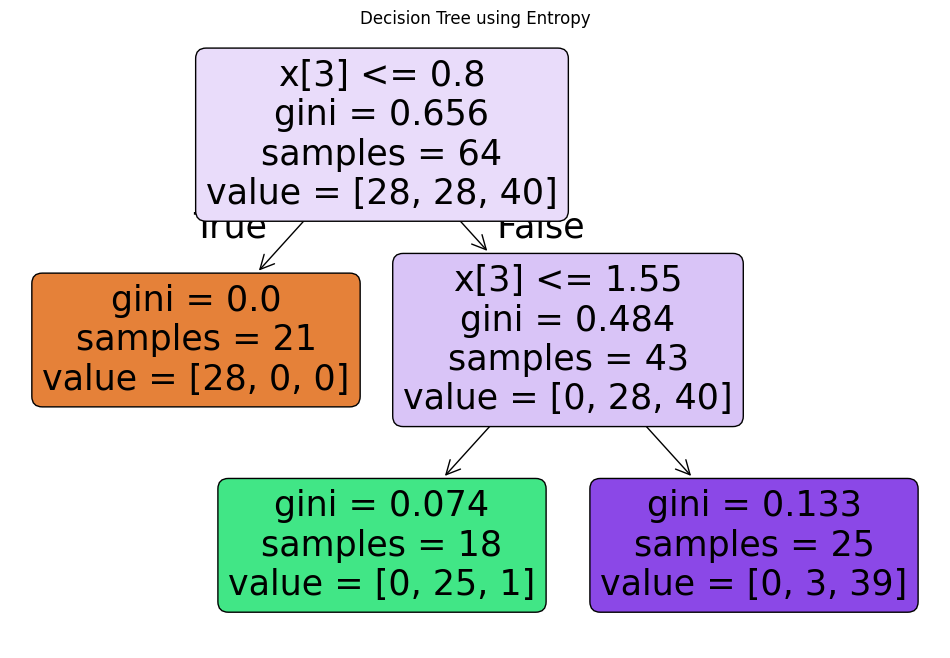

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(rf_classifier.estimators_[0], filled=True, rounded=True)
plt.title("Decision Tree using Entropy")
plt.show()

### Random Spaces

Suppose we were given a dataset on which we build a Random Forest and it so happens that one of the features is quite important for our data set. This means that every tree in our forest will consider this feature to be important and so our tree are more correlated. This means that this model is not very generalizable now. We can fix this problem with Random Spaces.

The idea is simple. If Bagging is getting random subset of data points for each tree, Random Spaces is getting random subset of features for each tree. If we have $F$ features, then most commonly we take:
1. About $\sqrt{F}$ of random features for classification forest
2. About $F/3$ of random features for regression forest

Here is an example. Note the part that deals with Random Spaces is `max_features`. When we set it to `None` before, we used all features. If we omit it, by default RandomForestClassifier will use square root of total features.

In [ ]:
rf_classifier2 = RandomForestClassifier(n_estimators=10,                         # number of trees
                                       criterion='gini',
                                       max_samples=int(X_train.shape[0]*0.8),   # amount of samples in each tree
                                       min_impurity_decrease=0.1,
                                       max_depth=3,
                                       max_features=2,                          # we are using 2 features
                                       oob_score=True,
                                       random_state=42)

In [ ]:
rf_classifier2.fit(X_train, y_train)
y_pred2 = rf_classifier2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
oob_score = rf_classifier.oob_score_
print(f'Out-of-Bag Score: {oob_score:.2f}')

Accuracy: 1.00
Out-of-Bag Score: 0.94


We can check feature importance. (This can be done for decision trees as well)

In [ ]:
rf_classifier2.feature_importances_

array([0.18386654, 0.        , 0.38865419, 0.42747927])

Here is another way to this using `permutation_importance` that checks wheather permuting values for a feature changes its importance.

In [ ]:
result = permutation_importance(rf_classifier2, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
result.importances_mean

array([0.        , 0.        , 0.11666667, 0.26      ])

Here is an example of a single decision tree inside the forest

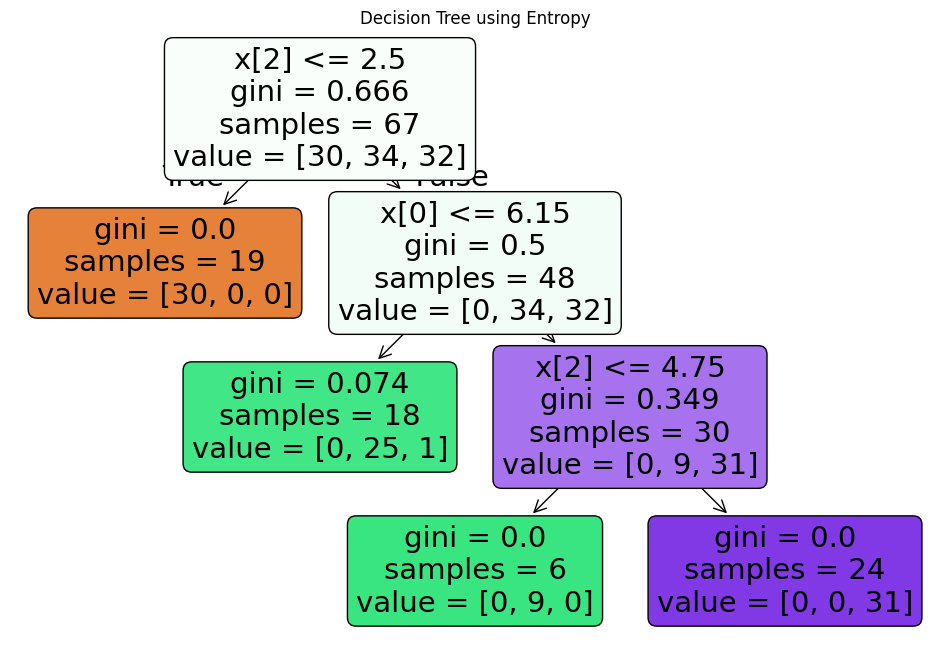

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(rf_classifier2.estimators_[3], filled=True, rounded=True)
plt.title("Decision Tree using Entropy")
plt.show()

### Regressor

A quick example with Random Forest Regressor

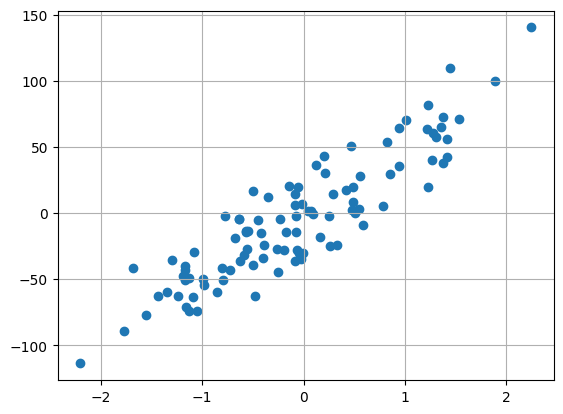

In [ ]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20)

fig=plt.figure()
plt.grid()

plt.scatter(X,y)

In [ ]:
rf_regressor=RandomForestRegressor(n_estimators=100,                         # number of trees
                                   max_samples=int(X_train.shape[0]*0.8),   # amount of samples in each tree
                                   min_impurity_decrease=0.1,
                                   max_depth=3,
                                   oob_score=True,
                                   random_state=42)

In [ ]:
rf_regressor.fit(X, y)

RandomForestRegressor(max_depth=3, max_samples=96, min_impurity_decrease=0.1,
                      oob_score=True, random_state=42)

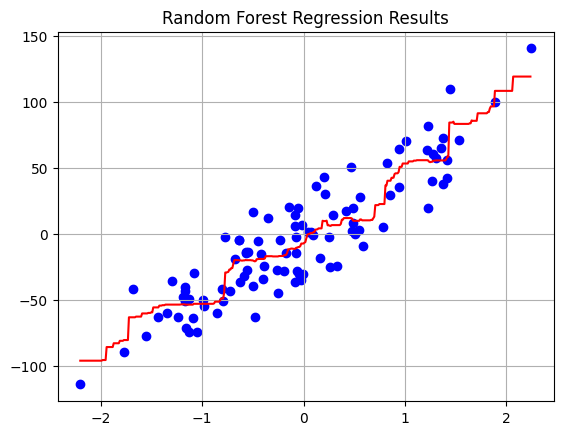

In [ ]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X,y, color='blue') #plotting real points
plt.plot(X_grid, rf_regressor.predict(X_grid),color='red') #plotting for predict points
plt.grid()
plt.title("Random Forest Regression Results")
plt.show()

In [ ]:
oob_score = rf_regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score:.2f}')

Out-of-Bag Score: 0.76


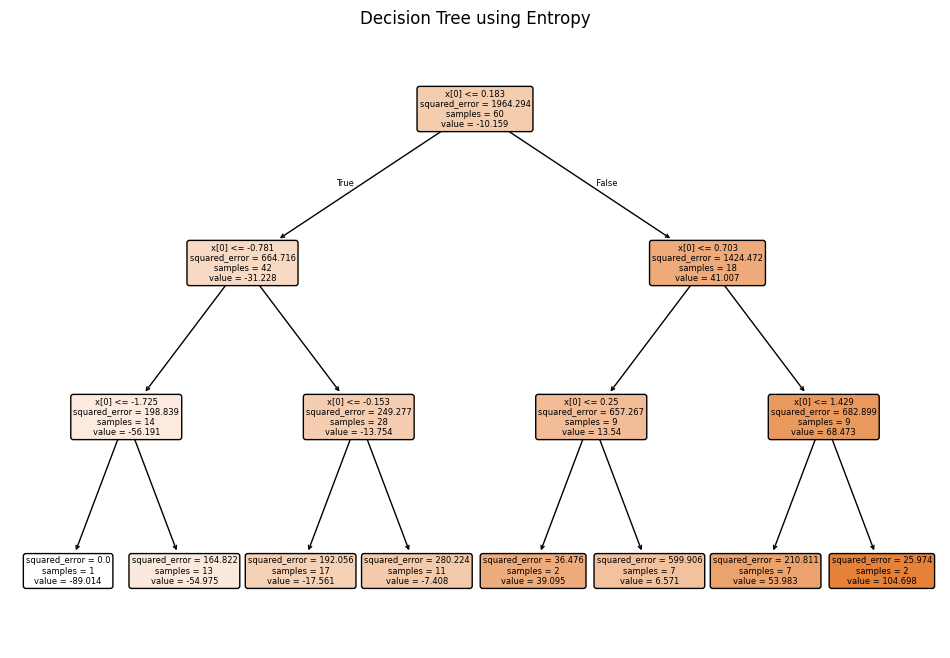

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(rf_regressor.estimators_[1], filled=True, rounded=True)
plt.title("Decision Tree using Entropy")
plt.show()